Import All the Libraries

In [37]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

Load the Image

In [24]:
image = cv2.imread('resources/image1.jpg')


Show using openCV

In [25]:
cv2.imshow('Image', image)

# Wait for a key press and close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

Show using matplotlib

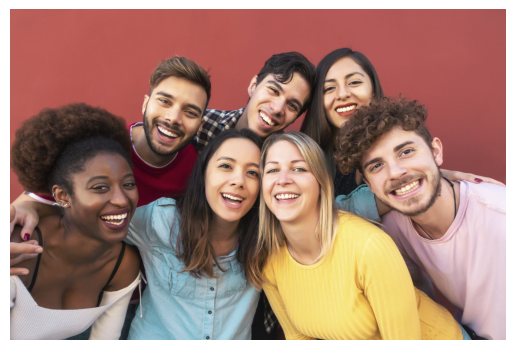

In [26]:
#matplotlib(RGB) and opencv(BGR) stores image differently so convert their COLOR PATTERN
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

Convert to grayscale and show using opencv and matplot lib

In [30]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale Image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

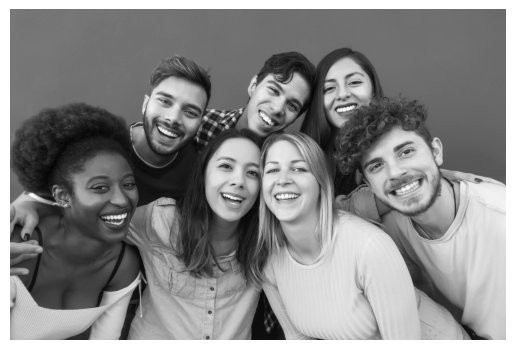

In [29]:
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

Convert to HSV and display with openCV

In [31]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

cv2.imshow('HSV Image', hsv_image)

# Wait for a key press and close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

displaying as matplotlib

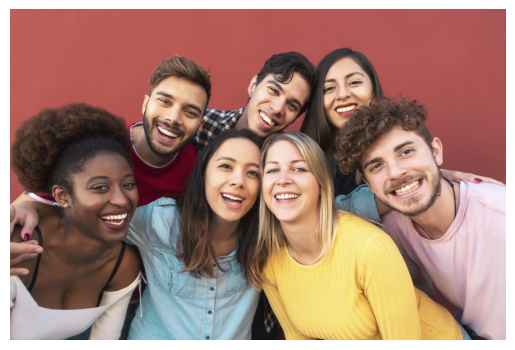

In [32]:
# Convert HSV to RGB for visualization
rgb_from_hsv = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

# Display the RGB-converted HSV image with Matplotlib
plt.imshow(rgb_from_hsv)
plt.axis('off')  # Turn off axis labels
plt.show()

Let's split the HSV channels

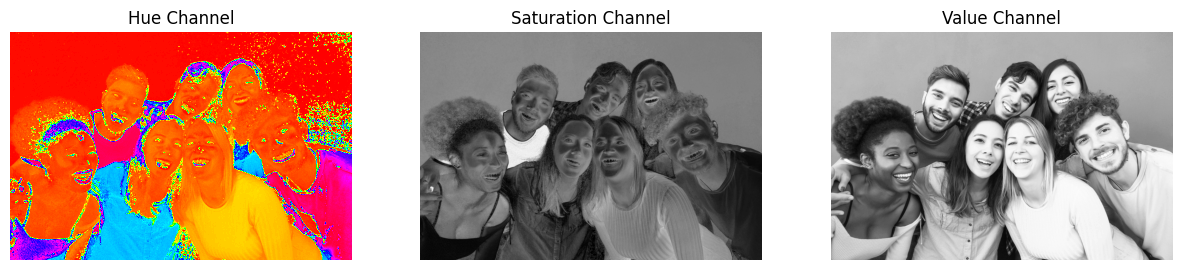

In [35]:
# Split HSV channels
hue_channel, saturation_channel, value_channel = cv2.split(hsv_image)

# Display the HSV channels with Matplotlib
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(hue_channel, cmap='hsv')
axs[0].set_title('Hue Channel')
axs[0].axis('off')

axs[1].imshow(saturation_channel, cmap='gray')
axs[1].set_title('Saturation Channel')
axs[1].axis('off')

axs[2].imshow(value_channel, cmap='gray')
axs[2].set_title('Value Channel')
axs[2].axis('off')

plt.show()

Segmenting different colors

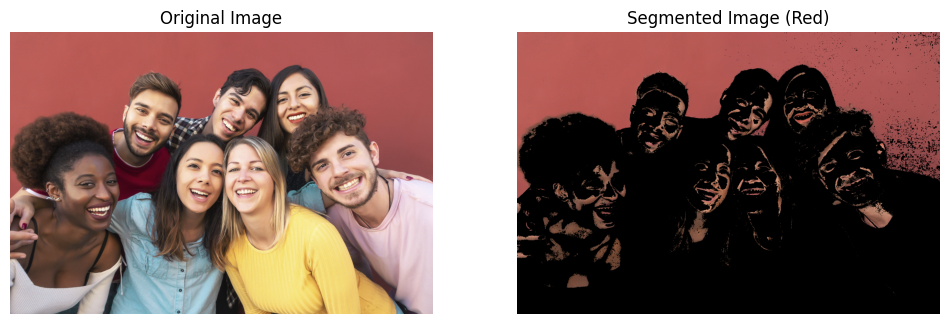

In [38]:
# Define the HSV range for the color to segment (e.g., red color)
# These values may need to be adjusted depending on the specific color and lighting conditions
lower_hsv = np.array([0, 100, 100])   # Lower bound of HSV values for red
upper_hsv = np.array([10, 255, 255]) # Upper bound of HSV values for red

# Create a mask based on the defined HSV range
mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)

# Apply the mask to the original image
segmented_image = cv2.bitwise_and(image, image, mask=mask)

# Convert the original and segmented images from BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

# Display the original and segmented images with Matplotlib
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(segmented_image_rgb)
axs[1].set_title('Segmented Image (Red)')
axs[1].axis('off')

plt.show()

Now, let's crop shit

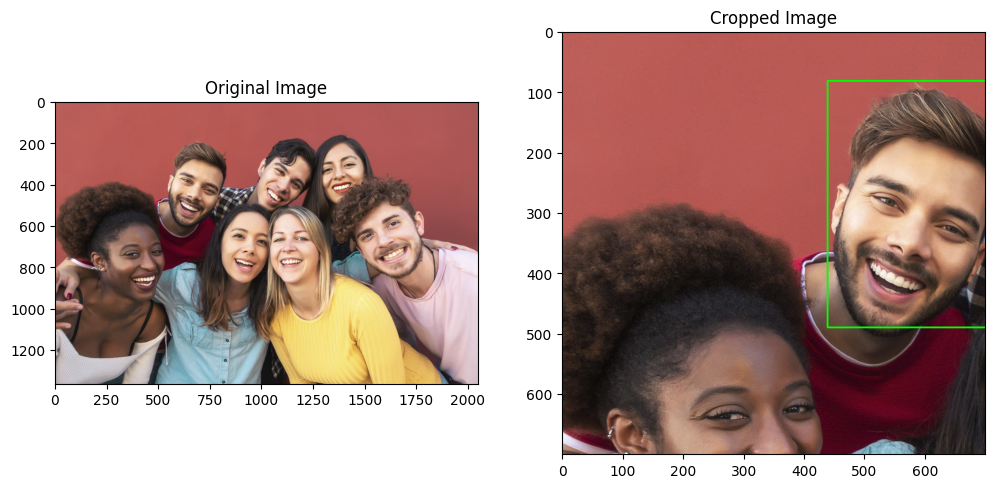

In [51]:
start_x, start_y = 100, 100
end_x, end_y = 800, 800

cropped_image = image[start_y:end_y, start_x:end_x]

cropped_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
#axs[0].axis('off')

axs[1].imshow(cropped_rgb)
axs[1].set_title('Cropped Image')
#axs[1].axis('off')

plt.show()

now it's turn to resize stuff. 

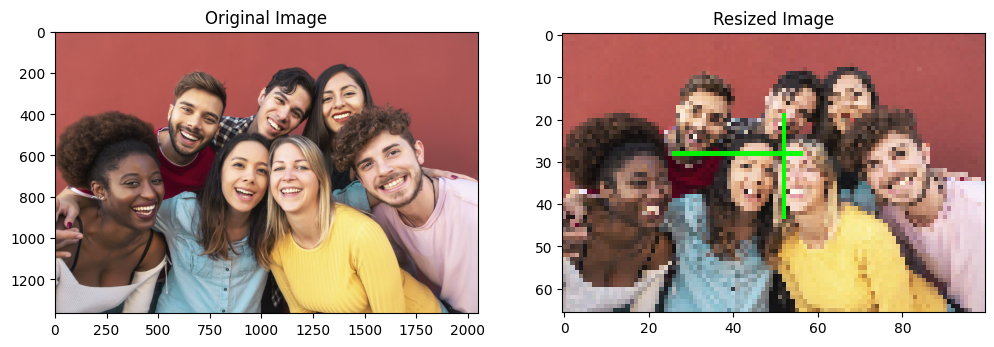

In [50]:
new_width = 100
aspect_ratio = image.shape[1] / image.shape[0]  # width/height
new_height = int(new_width / aspect_ratio)

resized_image = cv2.resize(image, (new_width, new_height))
resized_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
#axs[0].axis('off')

axs[1].imshow(resized_rgb)
axs[1].set_title('Resized Image')
#axs[1].axis('off')

plt.show()

now let's rorate image

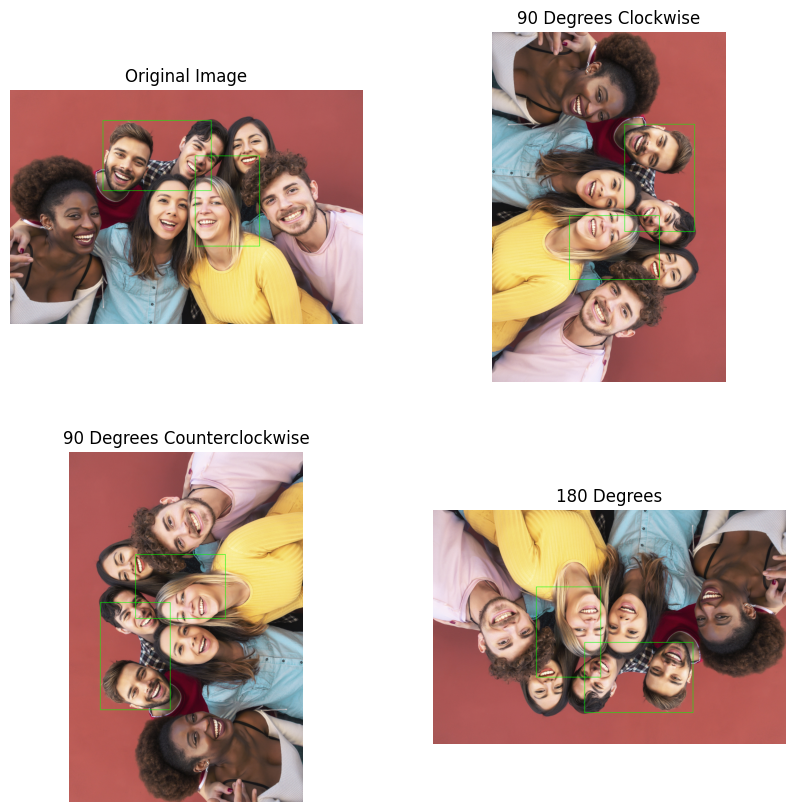

In [52]:
# Rotate the image 90 degrees clockwise
rotated_image_90_cw = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Rotate the image 90 degrees counterclockwise
rotated_image_90_ccw = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Rotate the image 180 degrees
rotated_image_180 = cv2.rotate(image, cv2.ROTATE_180)

# Convert images from BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rotated_image_90_cw_rgb = cv2.cvtColor(rotated_image_90_cw, cv2.COLOR_BGR2RGB)
rotated_image_90_ccw_rgb = cv2.cvtColor(rotated_image_90_ccw, cv2.COLOR_BGR2RGB)
rotated_image_180_rgb = cv2.cvtColor(rotated_image_180, cv2.COLOR_BGR2RGB)

# Display the original and rotated images with Matplotlib
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(rotated_image_90_cw_rgb)
axs[0, 1].set_title('90 Degrees Clockwise')
axs[0, 1].axis('off')

axs[1, 0].imshow(rotated_image_90_ccw_rgb)
axs[1, 0].set_title('90 Degrees Counterclockwise')
axs[1, 0].axis('off')

axs[1, 1].imshow(rotated_image_180_rgb)
axs[1, 1].set_title('180 Degrees')
axs[1, 1].axis('off')

plt.show()


Rotating and scaling with better control

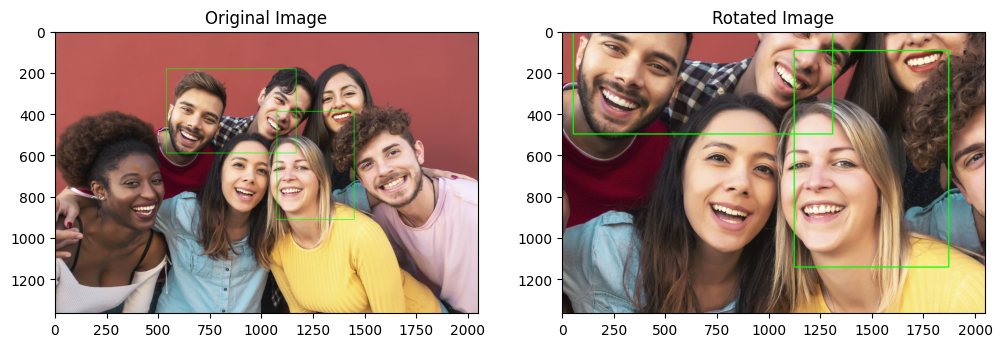

In [59]:
# Define the rotation parameters
angle = 0  # Rotation angle in degrees
scale = 2.0  # Scale factor (1.0 means no scaling)

# Get the dimensions of the image
(h, w) = image.shape[:2]

# Calculate the center of the image
center = (w // 2, h // 2)

# Create the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# Apply the rotation to the image
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
rotated_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
#axs[0].axis('off')

axs[1].imshow(rotated_rgb)
axs[1].set_title('Rotated Image')
#axs[1].axis('off')

plt.show()